<div id='wikitext'>
<p class='vspace'>Optimization deals with selecting the best option among a number of possible choices that are feasible or don't violate constraints. Python can be used to optimize parameters in a model to best fit data, increase profitability of a potential engineering design, or meet some other type of objective that can be described mathematically with variables and equations.
</p>
<p class='vspace'>Mathematical optimization problems may include equality constraints (e.g. =), inequality constraints (e.g. &lt;, &lt;=, &gt;, &gt;=), objective functions, algebraic equations, differential equations, continuous variables, discrete or integer variables, etc. A general statement of an optimization problem with nonlinear objectives or constraints is given by the following:
</p>
<p class='vspace'>$$\mathrm{minimize} \quad c\,x$$
$$\mathrm{subject\;to}\quad A \, x=b$$
$$\quad\quad\quad\quad A \, x&gt;b$$
</p>
<p class='vspace'>Two popular numerical methods for solving linear programming problems are the Simplex method and an Interior Point method.
</p>
<div class='vspace'></div><h4>Exercise: Soft Drink Production</h4>
<p>A simple production planning problem is given by the use of two ingredients <em>A</em> and <em>B</em> that produce products <em>1</em> and <em>2</em>. In this case, it requires:
</p>
<div class='vspace'></div><ul><li>3 units of <em>A</em> and 8 units of <em>B</em> to produce Product <em>1</em>
</li><li>6 units of <em>A</em> and 4 units of <em>B</em> to produce Product <em>2</em>
</li></ul><p class='vspace'>There are at most 5 units of Product <em>1</em> and 4 units of Product <em>2</em>. Product 1 can be sold for 100 and Product 2 can be sold for 125. The objective is to maximize the profit for this production problem.
</p>
<p class='vspace'>For this problem determine:
</p>
<div class='vspace'></div><ol><li>A potential feasible solution
</li><li>Identify the constraints on the contour plot
</li><li>Mark the set of feasible solutions on the contour plot
</li><li>Identify the minimum objective feasible solution
</li><li>Identify the maximum objective feasible solution
</li><li>Use a solver to find a solution
</li></ol><div class='vspace'></div><div class="img"><img width='500px' src='http://apmonitor.com/pdc/uploads/Main/lp_contour.png' alt='' title='' /></div>
<p class='vspace'>A contour plot can be used to explore the optimal solution. In this case, the black lines indicate the upper and lower bounds on the production of <em>1</em> and <em>2</em>. In this case, the production of <em>1</em> must be greater than 0 but less than 5. The production of <em>2</em> must be greater than 0 but less than 4. There are at most 30 units of <em>A</em> and 44 units of <em>B</em> ingredients that are available to produce products <em>1</em> and <em>2</em>.
</p>
<div class='vspace'></div><h4>Solution</h4>
<p><a class='urllink' href='https://apmonitor.com/online/view_pass.php?f=softdrink.apm' rel='nofollow'>Solve the Production Problem Online</a>
</p>
<p class='vspace'>Below are the source files for generating the contour plots in Python. The linear program is solved with the APM model through a web-service while the contour plot is generated with the Python package Matplotlib.
</p>
<p class='vspace'><span id='gekko-tog' class='toggle'><script type="text/javascript">document.write("<input type='button' class='inputbutton togglebutton' value='Show GEKKO Python Code' onclick=\"javascript:toggleObj('gekko','show','Show GEKKO Python Code','Hide','Show','Hide','','','','1','', 'block')\" />")</script></span>

In [6]:
# pip install gekko

In [4]:
%matplotlib inline

apm 95.62.123.102_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.9
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:              5
 Number of total equations: -            3
 Number of slack variables: -            2
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

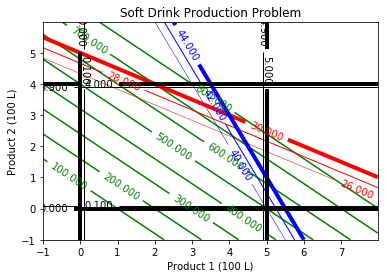

In [5]:
from gekko import GEKKO

m = GEKKO()

# variables
x1 = m.Var(value=0 , lb=0 , ub=5 , name='x1') # Product 1
x2 = m.Var(value=0 , lb=0 , ub=4 , name='x2') # Product 2
profit = m.Var(value=1 , name='profit')

# profit function
m.Obj(-profit)
m.Equation(profit==100*x1+125*x2)
m.Equation(3*x1+6*x2<=30)
m.Equation(8*x1+4*x2<=44)

m.solve()

print ('')
print ('--- Results of the Optimization Problem ---')
print ('Product 1 (x1): ' + str(x1[0]))
print ('Product 2 (x2): ' + str(x2[0]))
print ('Profit: ' + str(profit[0]))

## Generate a contour plot
# Import some other libraries that we'll need
# matplotlib and numpy packages must also be installed
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Design variables at mesh points
x = np.arange(-1.0, 8.0, 0.02)
y = np.arange(-1.0, 6.0, 0.02)
x1, x2 = np.meshgrid(x,y)

# Equations and Constraints
profit = 100.0 * x1 + 125.0 * x2
A_usage = 3.0 * x1 + 6.0 * x2
B_usage = 8.0 * x1 + 4.0 * x2

# Create a contour plot
plt.figure()
# Weight contours
lines = np.linspace(100.0,800.0,8)
CS = plt.contour(x1,x2,profit,lines,colors='g')
plt.clabel(CS, inline=1, fontsize=10)
# A usage < 30
CS = plt.contour(x1,x2,A_usage,[26.0, 28.0, 30.0],colors='r',linewidths=[0.5,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)
# B usage < 44
CS = plt.contour(x1, x2,B_usage,[40.0,42.0,44.0],colors='b',linewidths=[0.5,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)
# Container for 0 <= Product 1 <= 500 L
CS = plt.contour(x1, x2,x1 ,[0.0, 0.1, 4.9, 5.0],colors='k',linewidths=[4.0,1.0,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)
# Container for 0 <= Product 2 <= 400 L
CS = plt.contour(x1, x2,x2 ,[0.0, 0.1, 3.9, 4.0],colors='k',linewidths=[4.0,1.0,1.0,4.0])
plt.clabel(CS, inline=1, fontsize=10)

# Add some labels
plt.title('Soft Drink Production Problem')
plt.xlabel('Product 1 (100 L)')
plt.ylabel('Product 2 (100 L)')
# Save the figure as a PNG
plt.savefig('contour.png')

# Show the plots
plt.show()